# ANALIZA NAJBOLJŠIH ROCK ALBUMOV

V tem zvezku bom analiziral podatke, ki sem jih pridobil iz spletne strani https://www.besteveralbums.com/overall.php. Pobral sem 10 000 najuspešnejših rock albumov vseh časov. Najprej moramo uvoziti pandas, da bomo lahko odprli našo csv datoteko v kateri imamo za vsak album dan naslov, izvajalca, rank na lestvici, letnico izdaje, rating na podlagi glasovanja obiskovalcev spletne strani in rank score oziroma točke. S knjižnjico matplotlib si bomo pomagali pri prikazovanju grafov.

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

Najprej si oglejmo našo csv datoteko, kjer so albumi razvrščeni glede na njihov rank na lestvici:

In [75]:
df = pd.read_csv("albumi.csv", index_col="rank")

In [76]:
df

,izvajalec,naslov,letnica,rank_score,rating
rank,,,,,
1,Radiohead,OK Computer,1997,73005,92
2,Pink Floyd,The Dark Side Of The Moon,1973,68430,92
3,The Beatles,Abbey Road,1969,62922,92
4,The Beatles,Revolver,1966,55007,91
5,Radiohead,In Rainbows,2007,49008,90
...,...,...,...,...,...
9996,Sam Amidon,All Is Well,2007,118,74
9997,World Party,Bang!,1993,118,70
9998,John Coltrane,Lush Life,1961,118,75


# NAJUSPEŠNEJŠE LETO

Poglejmo si povprečje rank scora skozi leta:

In [77]:
kopija = df[["letnica", "rank_score"]].copy()

Najuspešnejše leto je bilo leto 1967 s povprečjem 2675


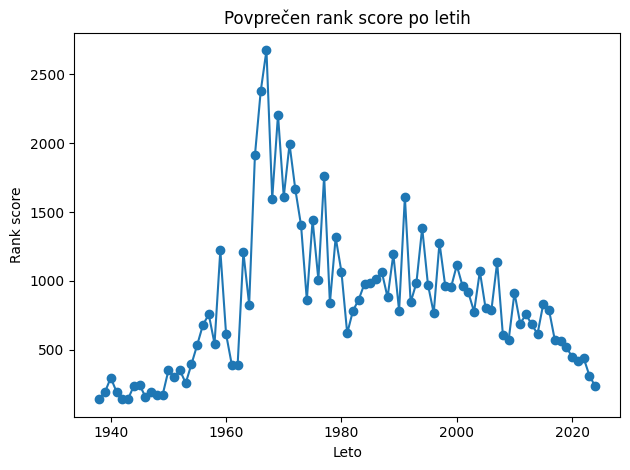

In [97]:
leto = kopija.groupby("letnica")["rank_score"].mean()
najbolse_leto = leto.idxmax()
najboljse_povprecje = leto.max()
leto.plot(x=leto.index, y=leto.values, marker='o')
print(f"Najuspešnejše leto je bilo leto {najbolse_leto} s povprečjem {round(najboljse_povprecje)}")
plt.title('Povprečen rank score po letih')
plt.xlabel('Leto')
plt.ylabel('Rank score')
plt.tight_layout()
plt.show()

Moja hipoteza je bila, da bo najuspešnejše leto 1991, saj so bili takrat izdani albumi kot na primer Nevermind, Blood Sugar Sex Magik, Black album, itd. Primerjajmo leti in poglejmo zakaj je bilo leto 1967 tako dominantno:

In [79]:
leto_izdaje = 1967
df_leto = df[df['letnica'] == leto_izdaje]
print(f"Izdanih je bilo {len(df_leto)} albumov.")
df_leto.sort_values(by='rank').head(10)

Izdanih je bilo 108 albumov.


,izvajalec,naslov,letnica,rank_score,rating
rank,,,,,
8,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,1967,48633,90
10,The Velvet Underground & Nico,The Velvet Underground & Nico,1967,44478,89
30,The Doors,The Doors,1967,28511,87
39,The Jimi Hendrix Experience,Are You Experienced,1967,23543,87
74,Love,Forever Changes,1967,16813,85
86,The Beatles,Magical Mystery Tour,1967,15608,86
148,Leonard Cohen,Songs Of Leonard Cohen,1967,10226,84
167,Pink Floyd,The Piper At The Gates Of Dawn,1967,9436,82
204,The Jimi Hendrix Experience,Axis: Bold As Love,1967,8018,83


In [80]:
leto_izdaje = 1991
df_leto = df[df['letnica'] == leto_izdaje]
print(f"Izdanih je bilo {len(df_leto)} albumov.")
df_leto.sort_values(by='rank').head(10)

Izdanih je bilo 142 albumov.


,izvajalec,naslov,letnica,rank_score,rating
rank,,,,,
14,Nirvana,Nevermind,1991,40938,87
22,My Bloody Valentine,Loveless,1991,32450,86
49,Pearl Jam,Ten,1991,19814,83
94,Slint,Spiderland,1991,13572,84
110,U2,Achtung Baby,1991,12648,80
135,A Tribe Called Quest,The Low End Theory,1991,10831,85
166,Talk Talk,Laughing Stock,1991,9437,84
185,Red Hot Chili Peppers,Blood Sugar Sex Magik,1991,8617,79
226,Metallica,Metallica,1991,7382,78


Poglejmo še graf kjer rank score za vsako leto samo seštejemo skupaj (ne vzamemo povprečja):

Najuspešnejše leto je bilo leto 1969 s skupno vsoto 328778


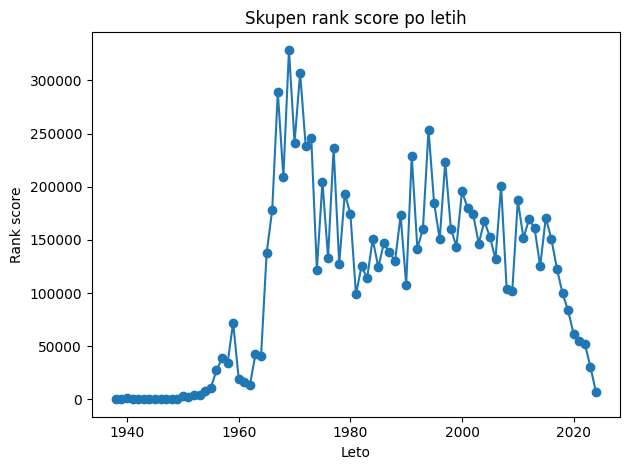

In [98]:
leto = kopija.groupby("letnica")["rank_score"].sum()
najbolse_leto = leto.idxmax()
najboljse_povprecje = leto.max()
leto.plot(x=leto.index, y=leto.values, marker='o')
print(f"Najuspešnejše leto je bilo leto {najbolse_leto} s skupno vsoto {round(najboljse_povprecje)}")
plt.title('Skupen rank score po letih')
plt.xlabel('Leto')
plt.ylabel('Rank score')
plt.tight_layout()
plt.show()

In [82]:
leto_izdaje = 1969
df_leto = df[df['letnica'] == leto_izdaje]
print(f"Izdanih je bilo {len(df_leto)} albumov.")
df_leto.sort_values(by='rank').head(10)

Izdanih je bilo 149 albumov.


,izvajalec,naslov,letnica,rank_score,rating
rank,,,,,
3,The Beatles,Abbey Road,1969,62922,92
25,King Crimson,In The Court Of The Crimson King (An Observati...,1969,30851,89
42,Led Zeppelin,Led Zeppelin II,1969,22536,87
62,The Rolling Stones,Let It Bleed,1969,18351,85
64,Led Zeppelin,Led Zeppelin,1969,18235,86
96,The Velvet Underground,The Velvet Underground,1969,13416,86
169,Nick Drake,Five Leaves Left,1969,9233,84
188,Neil Young & Crazy Horse,Everybody Knows This Is Nowhere,1969,8478,84
205,Miles Davis,In A Silent Way,1969,7977,86


Sedaj pa si poglejmo najboljše albume skozi leta:

In [83]:
pd.set_option('display.max_rows', 100)
najboljsi_album = df.loc[df.groupby('letnica')['rank_score'].idxmax()]
print(najboljsi_album[['letnica', 'naslov', 'rank_score']])


      letnica                                             naslov  rank_score
rank                                                                        
8541     1938                                 Bessie Smith Album         143
6736     1939                                 Negro Sinful Songs         191
3675     1940                       Dust Bowl Ballads - Volume 1         396
4420     1941  The Midnight Special (And Other Southern Priso...         318
8739     1942    Her Second Album Of Piano Solos With Drums Acc.         139
8674     1943    Songs By Lead Belly: Accompanied By Sonny Terry         141
5107     1944               An Album Of Outstanding Arrangements         266
5487     1945                                    Merry Christmas         243
6306     1946                         The Voice Of Frank Sinatra         206
5256     1947                      Teddy Wilson - Billie Holiday         255
5948     1948                        Chansons Des Cafés De Paris         221

Katerega leta je bilo izdanih največ rock albumov?

Največ albumov je bilo izdanih leta 2013, skupno 236 albumov.


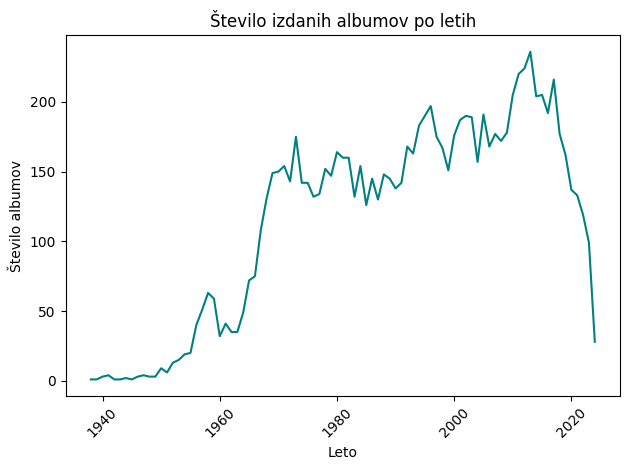

In [99]:
albumi = df['letnica'].value_counts()
idmax = albumi.idxmax()
max = albumi.max()
print(f"Največ albumov je bilo izdanih leta {idmax}, skupno {max} albumov.")
albumi.sort_index().plot(color='teal')
plt.title('Število izdanih albumov po letih')
plt.xlabel('Leto')
plt.ylabel('Število albumov')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vidimo lahko, da število izdanih albumov še ne pomeni, da žanr pridobiva na popularnosti.

Korelacija med ratingom poslušalcev in rankom:

Korelacija med ratingom poslušalcev in rankom: 0.4157182028168717


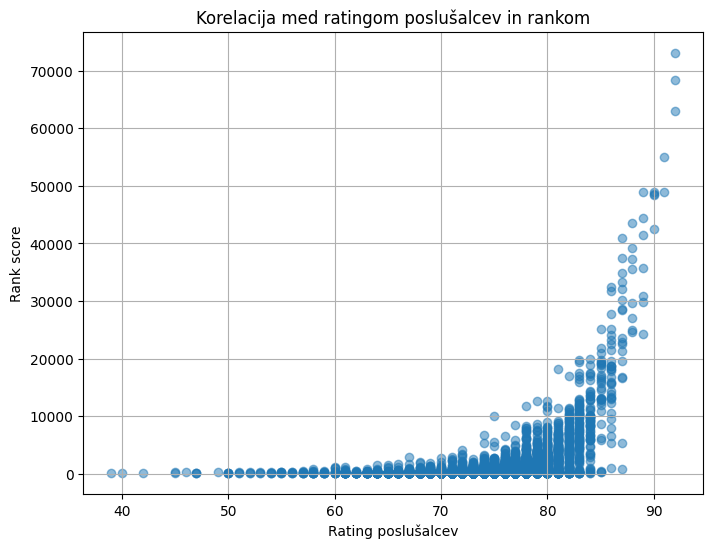

In [96]:
df1 = pd.read_csv("albumi.csv")
correlation = df1['rating'].corr(df1['rank_score'])
print(f'Korelacija med ratingom poslušalcev in rankom: {correlation}')
plt.figure(figsize=(8, 6))
plt.scatter(df1['rating'], df1['rank_score'], alpha=0.5)
plt.title('Korelacija med ratingom poslušalcev in rankom')
plt.xlabel('Rating poslušalcev')
plt.ylabel('Rank score')
plt.grid(True)
plt.show()

Primerjava ratingov za posamezne albume:

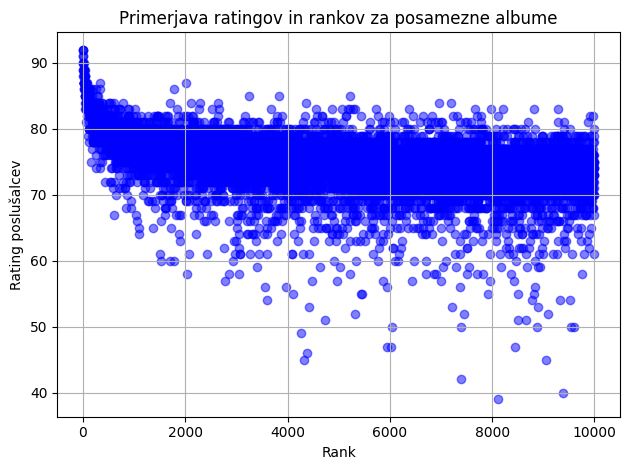

In [107]:
df1 = pd.read_csv("albumi.csv")
plt.scatter(df1['rank'], df1['rating'], alpha=0.5, color='blue')
plt.title('Primerjava ratingov za posamezne albume')
plt.xlabel('Rank')
plt.ylabel('Rating poslušalcev')
plt.grid(True)
plt.tight_layout()
plt.show()


# NAJUSPEŠNEJŠI IZVAJALCI

Poglejmo si uspešnost posameznih izvajalcev:

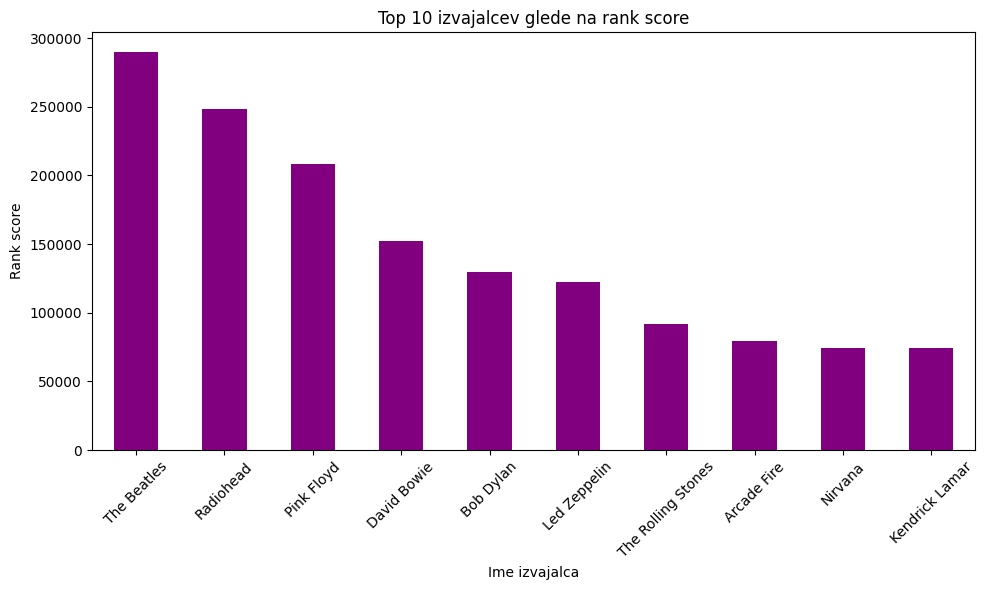

In [100]:
df_avg_rating = df.groupby('izvajalec')['rank_score'].sum().sort_values(ascending=False)
df_avg_rating.head(10).plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Top 10 izvajalcev glede na rank score')
plt.xlabel('Ime izvajalca')
plt.ylabel('Rank score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

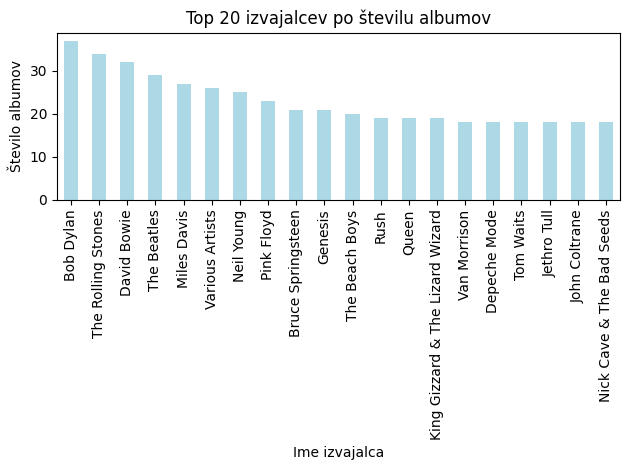

In [104]:
izvajatelj = df['izvajalec'].value_counts()
izvajatelj.head(20).plot(kind='bar', color='lightblue')
plt.title('Top 20 izvajalcev po številu albumov')
plt.xlabel('Ime izvajalca')
plt.ylabel('Število albumov')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()